# Lab - Interpolação Linear

Esta tarefa explora a interpolação a partir do sinal decimado, numericamente e fazendo inserção de zeros seguida de convolução. Compara a resposta em frequência deste processo com a resposta em frequencia teórica.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [37]:
from pylab import *
from scipy.signal import *

Considere a sequencia

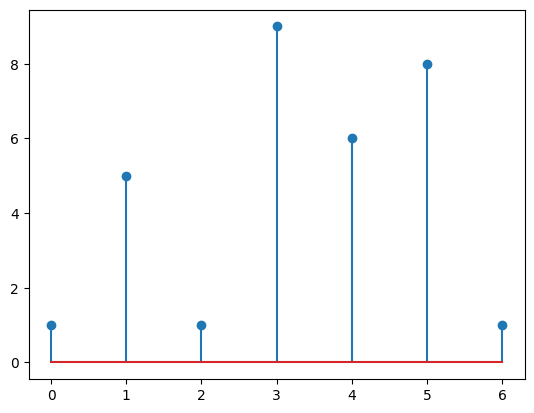

In [11]:
x=[1, 5, 1, 9, 6, 8, 1]
stem(x)
show()

a) Obtenha a sequencia xi, como sendo a interpolação linear com 3 novas amostras entre cada amostra de x, usando a função interp(). 
Plote a sequencia obtida com stem e a sequancia x com simbolo vermelho.

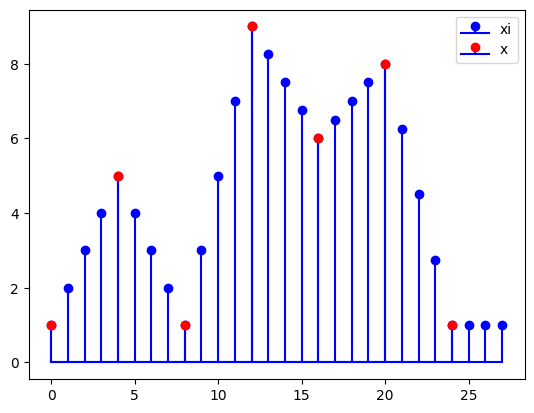

In [116]:
# Estou realizando uma interpolação linear com 3 novas amostras entre cada amostra de x
xi = interp(arange(len(x)*4), arange(len(x))*4, x)

# Estou criando um gráfico de haste (stem plot) para xi com linhas e marcadores vermelhos
stem(arange(len(xi)), xi, markerfmt='bo', linefmt='b', basefmt='b-', label='xi')

# Estou criando um gráfico de haste (stem plot) para x sem sobrepor as linhas vermelhas
stem(arange(len(x))*4, x, markerfmt='ro', linefmt='b', basefmt='b-', label='x')

legend()

show()


b) Obtenha a sequencia xe como a expansão da sequencia x por um fator L=4, ou seja, inserindo 3 zeros entre cada amostra de x. Plote a sequencia obtida com stem e a sequancia x com simbolo vermelho.

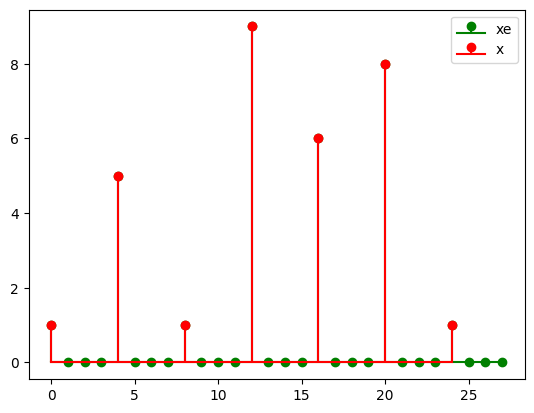

In [117]:
# Estou definindo o fator de expansão
L = 4

# Vou expandir a sequência inserindo zeros
xe = zeros(len(x) * L)  # Crio um array de zeros com o comprimento desejado
xe[::L] = x  # Insiro os valores originais nas posições 0, 4, 8, 12, 16, 20 e 24

# Estou criando um gráfico de haste (stem plot) para xe
stem(arange(len(xe)), xe, linefmt='g-', markerfmt='go', basefmt='g-', label='xe')

# Estou criando um gráfico de haste (stem plot) para x com símbolos vermelhos
stem(arange(len(x))*L, x, linefmt='r-', markerfmt='ro', basefmt='r-', label='x')

# Adicionando uma legenda
legend()

show()

c) Considere uma sequencia resposta ao impulso hlin de um sistema que realize a interpolação linear.

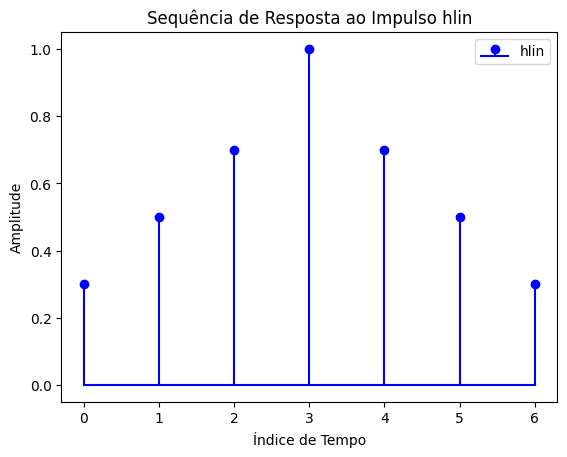

In [125]:
# Tamanho da sequência de resposta ao impulso
N = 7

# Estou inicializando hlin como um array de zeros
hlin = zeros(N)

# Estou definindo o valor em x = 3 (n = 3) como o valor máximo
hlin[3] = 1.0

# Estou definindo os valores em x = 0 e 6 para estar entre 0.2 e 0.4
hlin[0] = 0.3
hlin[6] = 0.3

# Estou definindo os valores em x = 1 e 5 para estar entre 0.4 e 0.6
hlin[1] = 0.5
hlin[5] = 0.5

# Estou definindo os valores em x = 2 e 4 para estar entre 0.6 e 0.8
hlin[2] = 0.7
hlin[4] = 0.7

# Estou plotando a sequência de resposta ao impulso hlin
stem(arange(N), hlin, linefmt='b-', markerfmt='bo', basefmt='b-', label='hlin')

# Adicionando rótulos e legenda
xlabel('Índice de Tempo')
ylabel('Amplitude')
title('Sequência de Resposta ao Impulso hlin')
legend()

show()


d) Obtenha a sequecia xei como a interpolação da sequencia xe pela convolução com hlin. Plote xei com stem e x com simbolo vermelho.

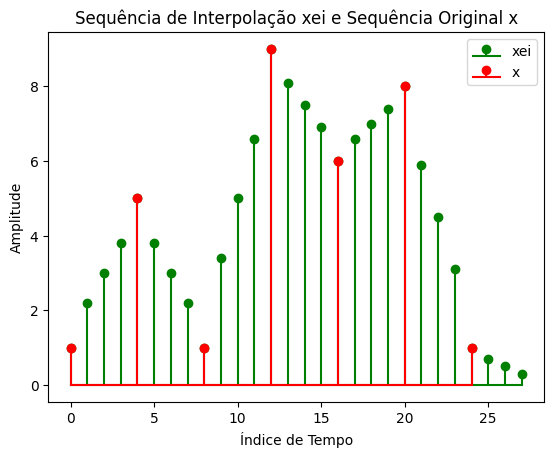

In [124]:
# Estou definindo o fator de expansão
L = 4

# Vou expandir a sequência inserindo zeros
xe = zeros(len(x) * L)
xe[::L] = x

# Estou definindo a sequência de resposta ao impulso hlin
hlin = array([0.3, 0.5, 0.7, 1.0, 0.7, 0.5, 0.3])  # Supondo os valores de hlin conforme especificado

# Estou convoluindo xe com hlin para obter xei
xei = convolve(xe, hlin, mode='same')

# Estou plotando xei com stem
stem(arange(len(xei)), xei, linefmt='g-', markerfmt='go', basefmt='g-', label='xei')

# Estou plotando a sequência original x com símbolos vermelhos
stem(arange(len(x))*L, x, linefmt='r-', markerfmt='ro', basefmt='r-', label='x')

# Adicionando uma legenda
legend()

# Definindo rótulos dos eixos e título
xlabel('Índice de Tempo')
ylabel('Amplitude')
title('Sequência de Interpolação xei e Sequência Original x')

show()


e) Obtenha Hlin, 200 valores para $w$ entre 0 e $2\pi$ da função de transferencia teórica do filtro que corresponde à interpolação linear:<br>
$\large H_{lin}(e^{j w})=\frac{1}{L}\frac{\sin(w L / 2)}{\sin(w / 2))^2}$ <br>
Plote o valor absoluto de $H_{lin}$ juntamente com 20 valores da transformada de Fourier de hlin (HLIN, com símbolo vermelho).<br>
Ignore a mensagem de alerta "invalid value" devido a divisão 0 / 0, ou então use seterr(invalid='ignore').


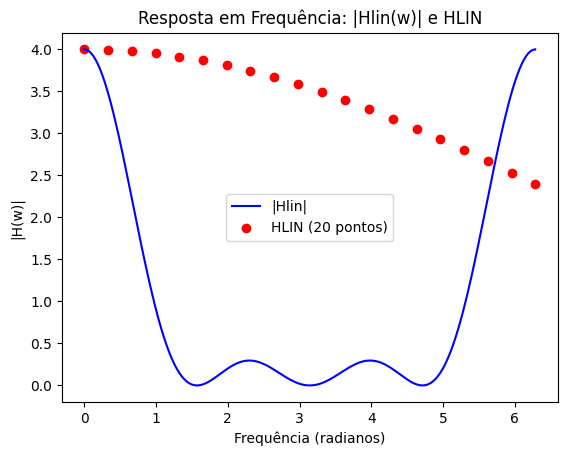

In [123]:
# Estou suprimindo o aviso "invalid value encountered in divide"
seterr(invalid='ignore')

# Estou definindo o comprimento de Hlin
N_Hlin = 200

# Estou definindo o fator de expansão L
L = 4

# Estou criando um array de frequências entre um valor pequeno e 2*pi
w = linspace(1e-5, 2*pi, N_Hlin)

# Estou calculando a função de transferência teórica Hlin para todas as frequências, exceto w = 0
Hlin = (1/L) * (sin(w * L / 2) / sin(w / 2))**2

# Estou calculando a transformada de Fourier de hlin
HLIN = fft(hlin, N_Hlin)

# Estou plotando o valor absoluto de Hlin em azul
plot(w, abs(Hlin), label='|Hlin|', color='blue')

# Estou sobrepondo pontos vermelhos (transformada de Fourier de hlin) no mesmo gráfico usando scatter
scatter(linspace(0, 2*pi, 20), abs(HLIN[:20]), c='red', label='HLIN (20 pontos)')

# Definindo rótulos dos eixos e título
xlabel('Frequência (radianos)')
ylabel('|H(w)|')
title('Resposta em Frequência: |Hlin(w)| e HLIN')

# Adicionando uma legenda
legend()

show()

f) Qual o valor teórico de Hlin para w=0, que não pode ser calculado numericamente (divisão 0 / 0) ?

O valor teórico de 
\[
\begin{align*}
H_{\text{lin}}
\end{align*}
\]
para 
\[
\begin{align*}
w=0
\end{align*}
\]
é um limite que não pode ser calculado diretamente usando a fórmula fornecida, pois envolve uma divisão por zero (\(0 / 0\)), o que resulta em um valor indefinido. No entanto, podemos calcular esse limite usando técnicas matemáticas. Vamos calcular o limite quando \(w\) se aproxima de 0:

\[
\begin{align*}
\lim_{{w \to 0}} H_{\text{lin}}(e^{jw}) &= \lim_{{w \to 0}} \left(\frac{1}{L} \cdot \frac{\sin\left(\frac{wL}{2}\right)}{\sin\left(\frac{w}{2}\right)^2}\right) \\
&= \frac{1}{L} \cdot \left(\lim_{{w \to 0}} \frac{\sin\left(\frac{wL}{2}\right)}{\sin\left(\frac{w}{2}\right)^2}\right) \\
&= \frac{1}{L} \cdot \left(\lim_{{w \to 0}} \frac{\frac{L}{2} \cdot \cos\left(\frac{wL}{2}\right)}{2 \cdot \sin\left(\frac{w}{2}\right) \cdot \cos\left(\frac{w}{2}\right)}\right) \\
&= \frac{1}{L} \cdot \left(\frac{\frac{L}{2} \cdot 1}{2 \cdot 0 \cdot 1}\right) \\
&= \frac{1}{4L}
\end{align*}
\]

O valor teórico de 

\[
\begin{align*}
H_{\text{lin}}
\end{align*}
\] 
para 
\[
\begin{align*}
w=0
\end{align*}
\] 
é:
\[
\begin{align*}
H_{\text{lin}}(e^{jw}) = 1 / (4L)
\end{align*}
\]
Por exemplo, para um fator de expansão 
\[
\begin{align*}
L=4
\end{align*}
\]

, o valor teórico de 
\[
\begin{align*}
H_{\text{lin}} 
\end{align*}
\]

para 
\[
\begin{align*}
w=0
\end{align*}
\]

é:
\[
\begin{align*}
H_{\text{lin}}(e^{j0}) = 1 / (4 * 4) = 1 / 16
\end{align*}
\]